In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

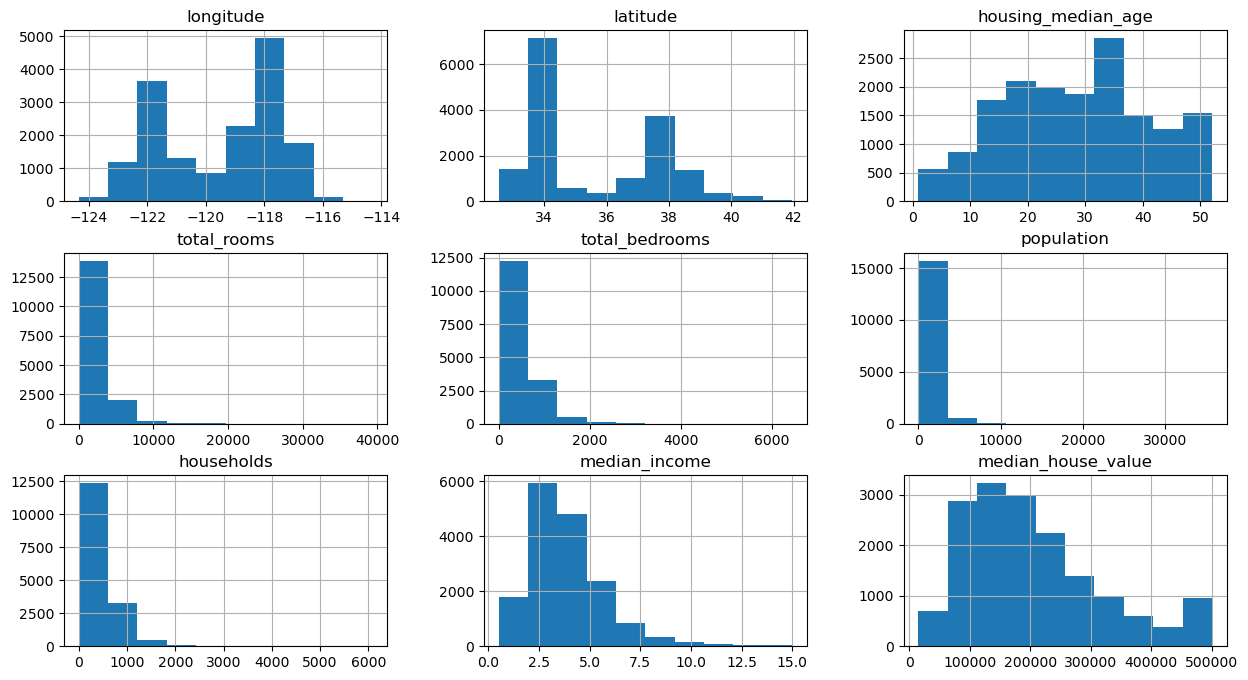

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

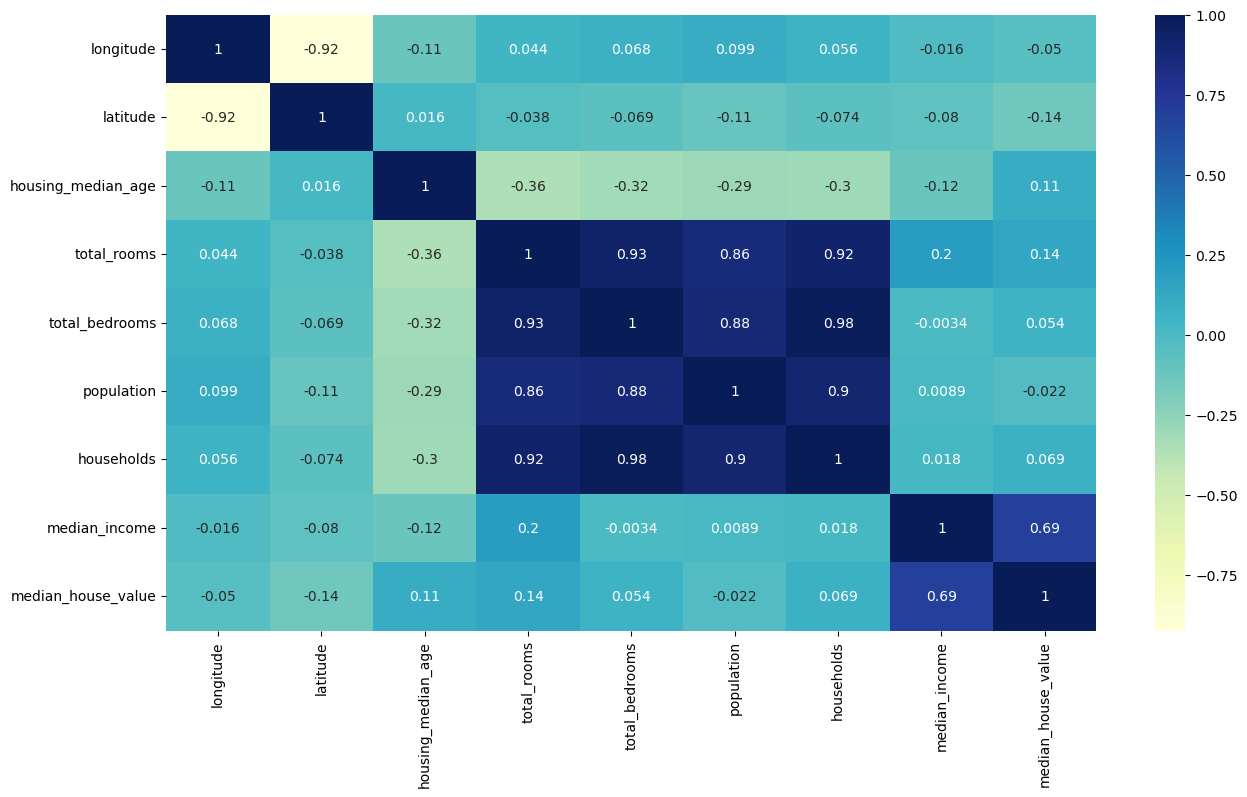

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

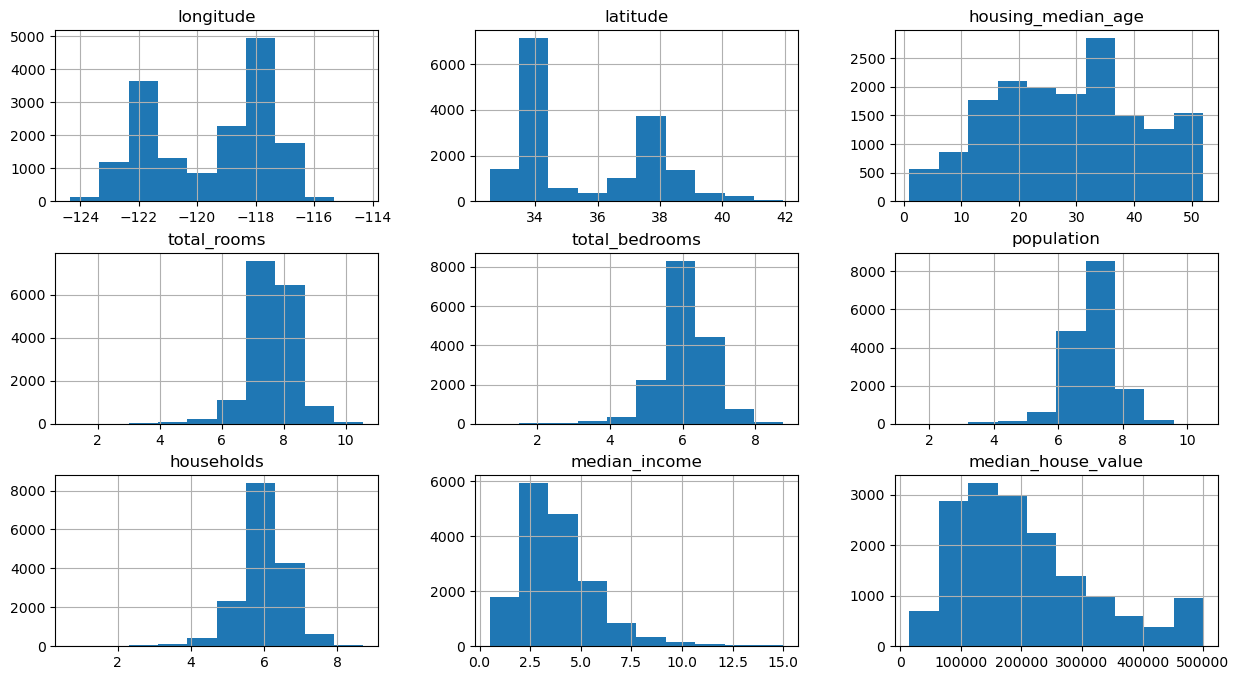

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
dummies = pd.get_dummies(train_data.ocean_proximity)
dummies = dummies.astype(int)
train_data = train_data.join(dummies).drop(['ocean_proximity'], axis=1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5811,-118.26,34.13,37.0,7.232733,6.154858,7.078342,6.113682,2.5000,207100.0,1,0,0,0,0
18444,-121.81,37.25,5.0,7.588830,6.255750,6.759255,6.089045,4.4565,159000.0,1,0,0,0,0
5928,-117.80,34.10,13.0,8.005367,6.206576,7.080026,6.142037,6.2456,161700.0,0,1,0,0,0
15955,-122.45,37.71,52.0,7.413970,5.777652,6.991177,5.789960,3.8583,261600.0,0,0,0,0,1
9008,-118.60,34.08,40.0,6.765039,5.204007,5.991465,5.176150,6.9100,380000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,-118.28,34.18,50.0,7.694393,5.820083,6.778785,5.736572,6.8840,365600.0,1,0,0,0,0
8093,-118.21,33.82,45.0,6.122493,4.532599,5.978886,4.499810,4.9562,165700.0,0,0,0,0,1
17914,-121.99,37.36,32.0,7.470224,5.783825,6.822197,5.802118,4.6761,298300.0,1,0,0,0,0
18103,-122.04,37.30,25.0,7.769379,6.035481,6.981935,5.988961,6.9238,345900.0,1,0,0,0,0


<Axes: >

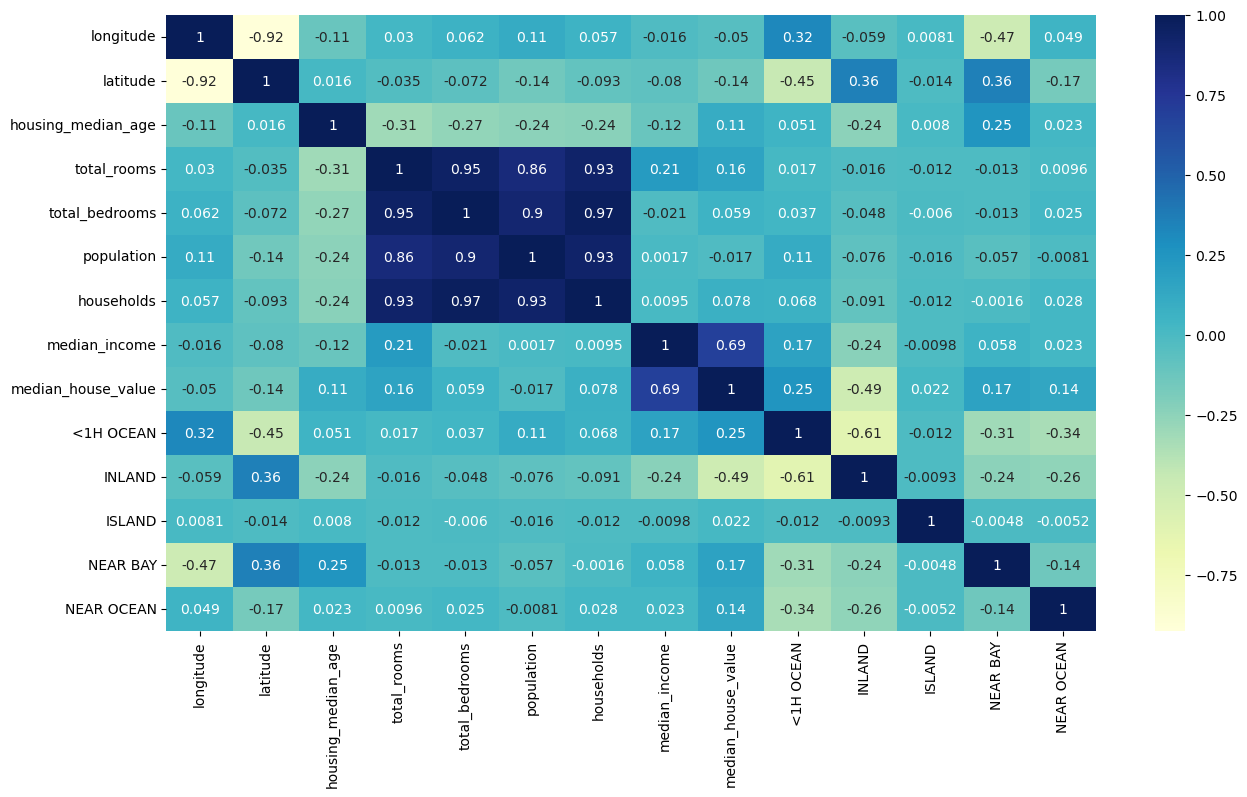

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

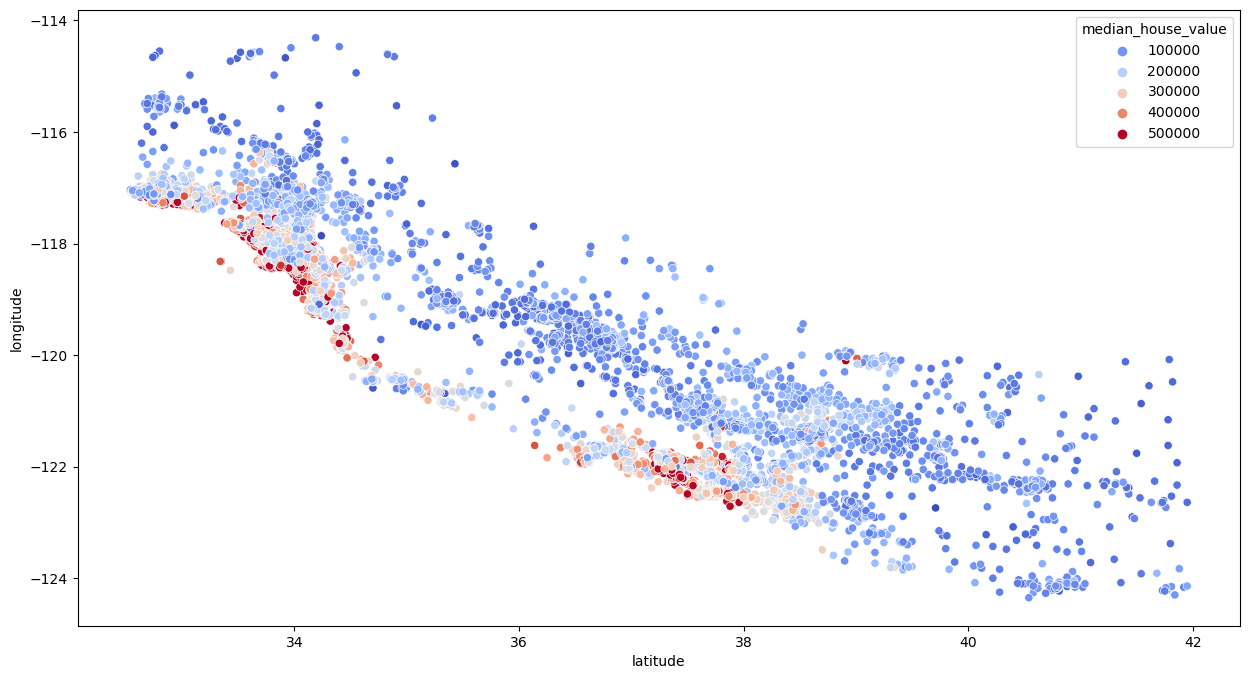

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

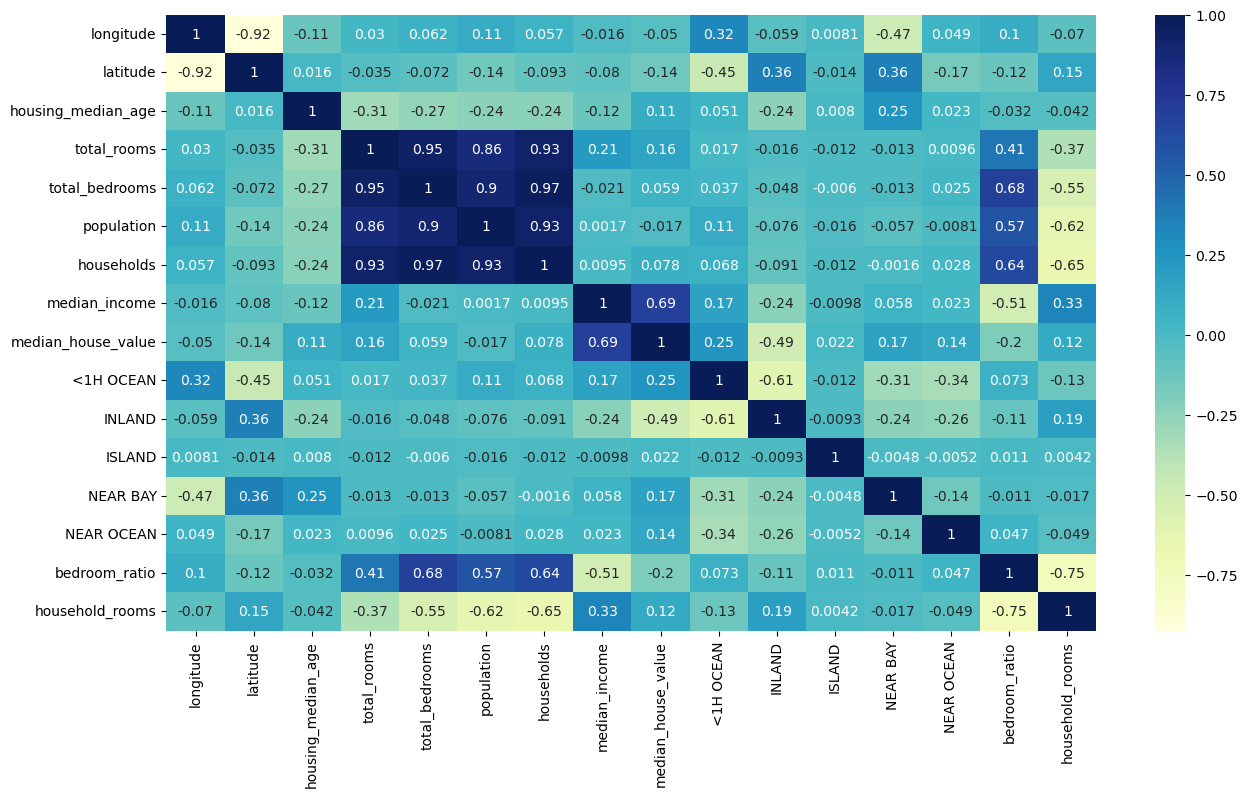

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=['number']).corr(), annot=True, cmap="YlGnBu")

In [20]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_train.shape

(16346, 15)

In [21]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

dummies = pd.get_dummies(test_data.ocean_proximity)
dummies = dummies.astype(int)
test_data = test_data.join(dummies).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [22]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
X_test = s_scaler.transform(X_test.astype(np.float64))

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error
from keras.regularizers import l1

In [129]:
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, kernel_regularizer=l1(0.01)))

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

# Define early stopping and checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
checkpoint = ModelCheckpoint('house_price_improved.keras', monitor='val_loss', save_best_only=True)

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
# Fit the model with the training data and validate with the test data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32, callbacks=[early_stopping, checkpoint])

Epoch 1/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 45220409344.0000 - mae: 177386.7812 - mse: 45220446208.0000 - val_loss: 7855623680.0000 - val_mae: 61777.6680 - val_mse: 7849601024.0000
Epoch 2/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6410470912.0000 - mae: 57127.7852 - mse: 6410471936.0000 - val_loss: 5917990400.0000 - val_mae: 53788.4883 - val_mse: 5912066048.0000
Epoch 3/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5312204800.0000 - mae: 51970.8789 - mse: 5312202752.0000 - val_loss: 5265512960.0000 - val_mae: 50382.8281 - val_mse: 5259624448.0000
Epoch 4/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4849717248.0000 - mae: 49462.5859 - mse: 4849718272.0000 - val_loss: 4864206848.0000 - val_mae: 49396.4531 - val_mse: 4859117568.0000
Epoch 5/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 4600861696.0000 - mae: 47885.3477 - mse: 4600865792.0000 - val_loss: 4628880896.0000 - val_mae: 47362.3125 - val_mse: 4623915520.0000
Epoch 6/1000
511/

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3296425984.0000 - mae: 40765.6523 - mse: 3296422656.0000 - val_loss: 3617646336.0000 - val_mae: 42187.8867 - val_mse: 3616677120.0000
Epoch 37/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3355308800.0000 - mae: 41059.7344 - mse: 3355308288.0000 - val_loss: 3517148160.0000 - val_mae: 41271.4531 - val_mse: 3516024832.0000
Epoch 38/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3311083520.0000 - mae: 40389.9219 - mse: 3311080960.0000 - val_loss: 3493467904.0000 - val_mae: 41058.2539 - val_mse: 3491865344.0000
Epoch 39/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3425893632.0000 - mae: 40913.1133 - mse: 3425893120.0000 - val_loss: 3508680448.0000 - val_mae: 41292.0586 - val_mse: 3507506944.0000
Epoch 40/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3386572544.0000 - mae: 40829.0312 - mse: 3386572288.0000 - val_loss: 3508535552.0000 - val_mae: 41227.2617 - val_mse: 3507652608.0000
Epoch 41/1000
511/511 ━━━━━━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2926551552.0000 - mae: 37355.6953 - mse: 2926552064.0000 - val_loss: 3262701568.0000 - val_mae: 40068.0430 - val_mse: 3263434752.0000
Epoch 72/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2927013376.0000 - mae: 37525.0547 - mse: 2927008000.0000 - val_loss: 3201176832.0000 - val_mae: 38114.4531 - val_mse: 3200991232.0000
Epoch 73/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2898398976.0000 - mae: 37414.2422 - mse: 2898393856.0000 - val_loss: 3219806208.0000 - val_mae: 38143.3945 - val_mse: 3219668736.0000
Epoch 74/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2922080000.0000 - mae: 37174.2461 - mse: 2922080000.0000 - val_loss: 3203130880.0000 - val_mae: 38752.0977 - val_mse: 3202852608.0000
Epoch 75/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3060270592.0000 - mae: 38125.5820 - mse: 3060271616.0000 - val_loss: 3181070592.0000 - val_mae: 38819.5977 - val_mse: 3181018368.0000
Epoch 76/1000
511/511 ━━━━━━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2690028544.0000 - mae: 35848.9297 - mse: 2690030592.0000 - val_loss: 3070506240.0000 - val_mae: 37499.3984 - val_mse: 3071971072.0000
Epoch 107/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2524436480.0000 - mae: 34608.6836 - mse: 2524435712.0000 - val_loss: 3004025856.0000 - val_mae: 37080.4219 - val_mse: 3004683008.0000
Epoch 108/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2577811456.0000 - mae: 34988.2070 - mse: 2577812224.0000 - val_loss: 3051731200.0000 - val_mae: 37548.5117 - val_mse: 3052961280.0000
Epoch 109/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2588747264.0000 - mae: 34949.0977 - mse: 2588748288.0000 - val_loss: 2998731776.0000 - val_mae: 37177.7344 - val_mse: 3000068352.0000
Epoch 110/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2556573440.0000 - mae: 34860.4141 - mse: 2556573696.0000 - val_loss: 2999132416.0000 - val_mae: 36909.9375 - val_mse: 3000513280.0000
Epoch 111/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2368395264.0000 - mae: 33519.8320 - mse: 2368395008.0000 - val_loss: 2976294144.0000 - val_mae: 36004.2891 - val_mse: 2977974784.0000
Epoch 142/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2378401280.0000 - mae: 33785.3281 - mse: 2378401536.0000 - val_loss: 2923000576.0000 - val_mae: 36451.4023 - val_mse: 2924481536.0000
Epoch 143/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2329550080.0000 - mae: 33534.3438 - mse: 2329548288.0000 - val_loss: 2967704064.0000 - val_mae: 36318.3164 - val_mse: 2969324288.0000
Epoch 144/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2427174144.0000 - mae: 33779.7695 - mse: 2427175680.0000 - val_loss: 2910365696.0000 - val_mae: 36217.5391 - val_mse: 2912018176.0000
Epoch 145/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2391190272.0000 - mae: 33839.7930 - mse: 2391192064.0000 - val_loss: 2950892288.0000 - val_mae: 35868.4297 - val_mse: 2952370432.0000
Epoch 146/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2255332352.0000 - mae: 32725.5508 - mse: 2255333120.0000 - val_loss: 2917838336.0000 - val_mae: 35385.3867 - val_mse: 2919493632.0000
Epoch 177/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2373694976.0000 - mae: 33636.0977 - mse: 2373696512.0000 - val_loss: 2790953728.0000 - val_mae: 35098.1367 - val_mse: 2792811008.0000
Epoch 178/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2253028608.0000 - mae: 32650.5625 - mse: 2253027840.0000 - val_loss: 2912267776.0000 - val_mae: 35652.1797 - val_mse: 2913918976.0000
Epoch 179/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2235229696.0000 - mae: 32343.5879 - mse: 2235231232.0000 - val_loss: 2900980992.0000 - val_mae: 35309.9414 - val_mse: 2902752768.0000
Epoch 180/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2335252224.0000 - mae: 32980.8281 - mse: 2335253760.0000 - val_loss: 2962945536.0000 - val_mae: 35553.0742 - val_mse: 2964608256.0000
Epoch 181/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2121541760.0000 - mae: 31790.4629 - mse: 2121538560.0000 - val_loss: 2925290496.0000 - val_mae: 36077.3789 - val_mse: 2927303680.0000
Epoch 212/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2066724608.0000 - mae: 31527.1602 - mse: 2066724096.0000 - val_loss: 2891087872.0000 - val_mae: 36098.7109 - val_mse: 2893157888.0000
Epoch 213/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2067726976.0000 - mae: 31686.3633 - mse: 2067726464.0000 - val_loss: 2877862400.0000 - val_mae: 36527.1680 - val_mse: 2880139776.0000
Epoch 214/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2226433792.0000 - mae: 32487.5488 - mse: 2226434304.0000 - val_loss: 2789929728.0000 - val_mae: 35371.6953 - val_mse: 2791457536.0000
Epoch 215/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2133667200.0000 - mae: 32009.9590 - mse: 2133668224.0000 - val_loss: 2834261504.0000 - val_mae: 35077.5312 - val_mse: 2836103424.0000
Epoch 216/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1969666304.0000 - mae: 30847.5215 - mse: 1969667072.0000 - val_loss: 2754033152.0000 - val_mae: 34933.9922 - val_mse: 2755509760.0000
Epoch 247/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1974469248.0000 - mae: 30851.6133 - mse: 1974469760.0000 - val_loss: 2856386816.0000 - val_mae: 34805.7148 - val_mse: 2858902272.0000
Epoch 248/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2019836672.0000 - mae: 31166.9180 - mse: 2019837824.0000 - val_loss: 2906875648.0000 - val_mae: 35361.4766 - val_mse: 2908825600.0000
Epoch 249/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2030083840.0000 - mae: 31040.2969 - mse: 2030079232.0000 - val_loss: 2812878848.0000 - val_mae: 35017.6719 - val_mse: 2814175488.0000
Epoch 250/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2044675584.0000 - mae: 31324.5547 - mse: 2044677120.0000 - val_loss: 2939916800.0000 - val_mae: 35374.9297 - val_mse: 2941926400.0000
Epoch 251/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1915978240.0000 - mae: 30270.3984 - mse: 1915976448.0000 - val_loss: 2754122240.0000 - val_mae: 34457.4492 - val_mse: 2755719936.0000
Epoch 282/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1905884416.0000 - mae: 30540.6387 - mse: 1905884160.0000 - val_loss: 2815392256.0000 - val_mae: 34972.7461 - val_mse: 2815893760.0000
Epoch 283/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1956219520.0000 - mae: 30689.6016 - mse: 1956217984.0000 - val_loss: 2986316288.0000 - val_mae: 35713.1250 - val_mse: 2987716352.0000
Epoch 284/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2001160320.0000 - mae: 30912.1680 - mse: 2001157376.0000 - val_loss: 2876446720.0000 - val_mae: 34506.0469 - val_mse: 2878126080.0000
Epoch 285/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1935978624.0000 - mae: 30442.1230 - mse: 1935979136.0000 - val_loss: 2892804608.0000 - val_mae: 35138.3789 - val_mse: 2893968128.0000
Epoch 286/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1855024384.0000 - mae: 29978.7559 - mse: 1855022848.0000 - val_loss: 2755429632.0000 - val_mae: 34532.0547 - val_mse: 2756560640.0000
Epoch 317/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1889909504.0000 - mae: 30106.1836 - mse: 1889906816.0000 - val_loss: 2780860160.0000 - val_mae: 35001.4102 - val_mse: 2781122048.0000
Epoch 318/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1847148800.0000 - mae: 30004.2520 - mse: 1847148672.0000 - val_loss: 2840210688.0000 - val_mae: 35356.3242 - val_mse: 2841182720.0000
Epoch 319/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1898978944.0000 - mae: 30313.6582 - mse: 1898978176.0000 - val_loss: 2878481152.0000 - val_mae: 35185.5156 - val_mse: 2880611840.0000
Epoch 320/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1876240384.0000 - mae: 30109.1582 - mse: 1876241920.0000 - val_loss: 2859361792.0000 - val_mae: 34799.2344 - val_mse: 2861147904.0000
Epoch 321/1000
511/511 ━━

511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1837132800.0000 - mae: 29635.0508 - mse: 1837132544.0000 - val_loss: 2727827456.0000 - val_mae: 34744.2617 - val_mse: 2729092096.0000
Epoch 352/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1809537664.0000 - mae: 29548.6621 - mse: 1809537408.0000 - val_loss: 2857191936.0000 - val_mae: 35324.1914 - val_mse: 2858611712.0000
Epoch 353/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1828405248.0000 - mae: 29848.8438 - mse: 1828403712.0000 - val_loss: 2768349952.0000 - val_mae: 34509.9219 - val_mse: 2769189888.0000
Epoch 354/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1782622336.0000 - mae: 29396.6133 - mse: 1782622336.0000 - val_loss: 2750003456.0000 - val_mae: 34347.0586 - val_mse: 2751336448.0000
Epoch 355/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1741988864.0000 - mae: 29083.2734 - mse: 1741989120.0000 - val_loss: 2823714816.0000 - val_mae: 34638.0859 - val_mse: 2824541184.0000
Epoch 356/1000
511/5

511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1745301632.0000 - mae: 29072.3496 - mse: 1745302784.0000 - val_loss: 2740388864.0000 - val_mae: 34690.4180 - val_mse: 2741332480.0000
Epoch 387/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1707686656.0000 - mae: 28899.5781 - mse: 1707687040.0000 - val_loss: 2889362944.0000 - val_mae: 35236.5234 - val_mse: 2889754368.0000
Epoch 388/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1805185408.0000 - mae: 29730.0996 - mse: 1805183104.0000 - val_loss: 2784695296.0000 - val_mae: 34556.8711 - val_mse: 2785742080.0000
Epoch 389/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1785810176.0000 - mae: 29491.3262 - mse: 1785809280.0000 - val_loss: 2733505280.0000 - val_mae: 34321.5234 - val_mse: 2733822208.0000
Epoch 390/1000
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1730922752.0000 - mae: 28855.2988 - mse: 1730922880.0000 - val_loss: 2834932736.0000 - val_mae: 35631.1719 - val_mse: 2834140160.0000
Epoch 391/1000
511/511 ━

<Axes: >

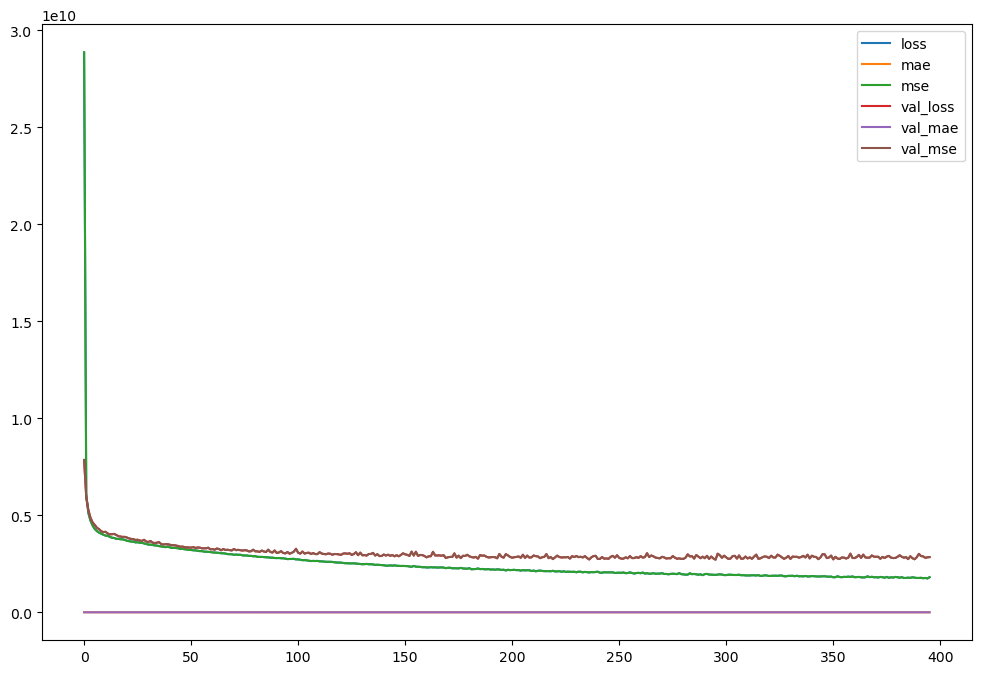

In [130]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2589806848.0000 - mae: 34141.5625 - mse: 2589826304.0000
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MAE: 34847.88
Test MSE: 2710546688.00
Test RMSE: 52062.91
Test R-squared (Variance Explained): 0.8023


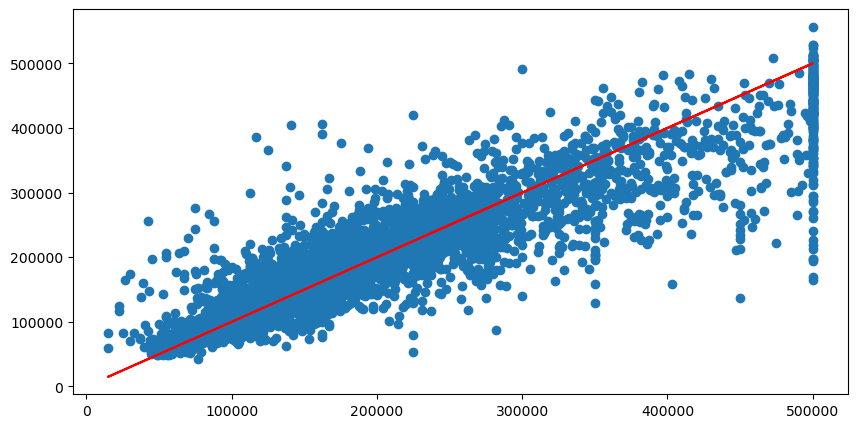

In [131]:
model.load_weights('house_price_improved.keras') 
test_loss, mae, mse = model.evaluate(X_test, y_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))

print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {np.sqrt(mse):.2f}")
print(f"Test R-squared (Variance Explained): {r2:.4f}")

fig = plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test, 'r')